 ## Project 1: 2 Stock Regression Analysis

In the middle of quarantine during Summer 2020, I began to try and learn Python. To practice, I thought it would be a good to combine Python with my interest in finance. This is my first project, and it is a simple function that models a linear regression between any two stocks over a given time period. 

A regression analysis quantifies the relationship between two variables. After plotting the variables in a scatterplot, we can use the SciPy library to plot a "line of best fit" which is a trend line that best represents the relationship between the two variables. SciPy can also give us a valued calle R^2 which measures how close the data is to the regression line. R^2 ranges from 0 to 1, and the higher the R^2, the more the two variables are related.

The function shows the relationship between two stock prices. The greater the R^2 value, the greater the correlation between the two stock prices which means the two stocks tend to move in tandem. Examining the R^2 and the graph can be useful for predicting the movement of stock prices. If the two stocks have a high R^2, and you expect stock1 to rally, then in you can invest in both stock1 and stock2.


In [4]:
#Import the necessary libraries. Yfinance is where you get historical stock prices.
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

#Here I define the function lin_Reg. s1 represents stock1, s2 represents stock2.
def lin_Reg(s1, s2, time):
    
    #The first step is pulling the historical closing price data over a certain period.
    stock1 = yf.Ticker(s1)
    stock1_hist = stock1.history(period=time)
    x = stock1_hist['Close']
    
    stock2 = yf.Ticker(s2)
    stock2_hist = stock2.history(period=time)
    y = stock2_hist['Close']
   
    #The next step is creating a scatter plot between the two stocks and adding labels.
    s=[5]
    plt.scatter(stock1_hist['Close'], stock2_hist['Close'], c="black", label='original data', s=s)
    plt.xlabel(s1)
    plt.ylabel(s2)
    plt.legend()
    
    #The next section plots the line of best fit.
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.legend()
    
    #Finally we print the slope and intercept of the best fit line and print the R^2 value.
    print("slope: %f    intercept: %f" % (slope, intercept))
    print("R^2: %f" %(r_value**2))


slope: 4.796148    intercept: 145.492400
R^2: 0.880871


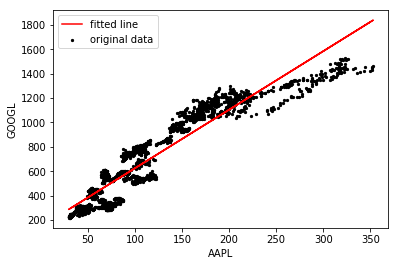

In [5]:
#We call the function by inputting  two stock symbols followed by the desired time period.
lin_Reg("AAPL", "GOOGL", "10y")